In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("diabetes.csv")

In [12]:
print("Raw data frame:")
print(df.head())
df.info()

Raw data frame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6  148.000         72.000         35.000  155.548 33.600   
1            1   85.000         66.000         29.000  155.548 26.600   
2            8  183.000         64.000         29.153  155.548 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    float64
 2   BloodPressure     768 non-null  

In [5]:
print("Null columns:")
print(df.isnull().sum())

Null columns:
Pregnancies           0
Glucose               5
BloodPressure        35
SkinThickness       227
Insulin             374
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome               0
dtype: int64


In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)
print("After filling the null columns:")
print(df.isnull().sum())

After filling the null columns:
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64


In [7]:
pd.options.display.float_format = "{:.3f}".format
print("Filled file:")
print(df.head())

Filled file:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6  148.000         72.000         35.000  155.548 33.600   
1            1   85.000         66.000         29.000  155.548 26.600   
2            8  183.000         64.000         29.153  155.548 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


In [8]:
columns = ["Glucose", "BloodPressure", "BMI", "Age", "Insulin", "Outcome"]
subset = df[columns]

In [9]:
correlation_matrix = subset.corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
               Glucose  BloodPressure   BMI   Age  Insulin  Outcome
Glucose          1.000          0.218 0.231 0.267    0.420    0.493
BloodPressure    0.218          1.000 0.281 0.325    0.073    0.166
BMI              0.231          0.281 1.000 0.026    0.167    0.312
Age              0.267          0.325 0.026 1.000    0.137    0.238
Insulin          0.420          0.073 0.167 0.137    1.000    0.214
Outcome          0.493          0.166 0.312 0.238    0.214    1.000


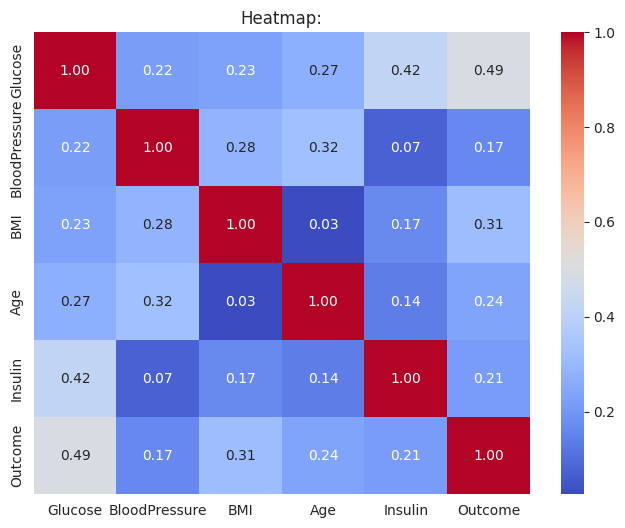

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap:")
plt.show()

In [13]:
correlation_with_outcome = correlation_matrix["Outcome"].drop("Outcome")
max_feature = correlation_with_outcome.idxmax()
max_value = correlation_with_outcome.max()
print("With most outcome with diabetes:")
print(f"{max_feature}: correlation count = {max_value:.2f}")

With most outcome with diabetes:
Glucose: correlation count = 0.49
